<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab4/ViktorB9898_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Integration**
**Viktor Beck**

# **Abstract**

This report features a method to approximate integrals of functions.

#**About the code**

In [8]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [9]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
from scipy.integrate import quad
import random

from matplotlib import pyplot as plt

# **Introduction**

This report is about numerical respectively approximative integration methods. Such methods are widely used by Python libraries like Numpy and Scipy and are very important for scientific computing.

The input for this Lab report was taken from the book of Professor Hoffman (https://doi-org.focus.lib.kth.se/10.1137/1.9781611976724) which corresponds to the content of the course:

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: 2-point Gauss quadrature over a unit interval**

The two point Gauss quadrature formula is given by
\begin{equation}
\int_{-1}^1 f(x)dx = \sum_{i=0}^q f(x_i)w_i
\end{equation}
where $f(x)$ is some polynomial, the $w_i$ are the quadrature weights and the $x_i$ the quadrature points.

The 2-point Gauss quadrature has the following properties for the interval [-1,1]:
\begin{equation}
x_1 = -\frac{1}{\sqrt 3},\quad x_2 = \frac{1}{\sqrt 3}, \quad w_1 = w_2 = 1.
\end{equation}
To get the right $x_i$ for the given interval [0,1] we can perform a coordinate mapping which is simply done by shifting and rescaling the coordinates. By that we get:
\begin{equation}
x_1 = \frac{(1-\frac{1}{\sqrt 3})}{2}, \quad x_2 = \frac{(1+\frac{1}{\sqrt 3})}{2},
\end{equation}

\begin{equation}
\int_{0}^1 f(x)dx = \frac{1}{2} \Bigg[ f(\frac{(1-\frac{1}{\sqrt 3})}{2}) + f \frac{(1+\frac{1}{\sqrt 3})}{2} \Bigg]
\end{equation}

In [10]:
def quadrature(f):
    x1 = (1-1/np.sqrt(3))/2
    x2 = (1+1/np.sqrt(3))/2
    return (f(x1) + f(x2))/2

### **3. Function: Monte Carlo quadrature over a unit interval**

Monte Carlo integration is based on a stochasitc approach. The formula is the following:
\begin{equation}
\int_D g(x)dx \approx \frac{|D|}{n}\sum_{i=0}^n g(x_i)
\end{equation}
where the $x_i$ are random samples within the range of D.

In [11]:
def monte_carlo_integration(f, n, a=0, b=1):
    sum = 0
    for i in range(n):
        sum += f(random.uniform(a, b))
    return sum / n * (b-a)

# **Results**

### **1. Function: 2-point Gauss quadrature over a unit interval**

In [12]:

def f1(x):
    return 4*x**3 + 3*x**2 + 2*x

def f2(x): 
    return -4*x**3 - 3*x**2 + 2*x

def f3(x):
    return 10*x**4

x = np.linspace(0,1,100)

F1 = quadrature(f1)
F1_exact = quad(f1, 0, 1)

F2 = quadrature(f2)
F2_exact = quad(f2, 0, 1)

F3 = quadrature(f3)
F3_exact = quad(f3, 0, 1)

print("F1:", F1, "\nF1: approximation - exact =", F1-F1_exact[0], "\n")

print("F2:", F2, "\nF2: approximation - exact =", F2-F2_exact[0], "\n")

print("F3:", F3, "\nF3: approximation - exact =", F3-F3_exact[0], "\n")


F1: 2.9999999999999996 
F1: approximation - exact = -4.440892098500626e-16 

F2: -0.9999999999999999 
F2: approximation - exact = 3.3306690738754696e-16 

F3: 1.9444444444444444 
F3: approximation - exact = -0.055555555555556024 



... one can see that 2-point Gauss quadrature is exact for polynomials up to degree 3 but not for higher degrees. In fact, it is exact for polynomials of degree 2q+1 and we have q=1 for the 2-point Gauss quadrature.

### **3. Function: Monte Carlo quadrature over a unit interval**

Integral of x² from 0 to 1 (n=10000): 0.3267322612954727
Exact: 0.3333333333333333


Text(0, 0.5, 'abs error')

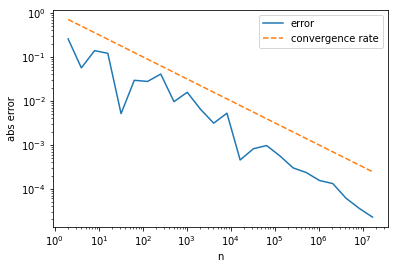

In [13]:
def f(x):
    return x**2

res = monte_carlo_integration(f, 10000)

print("Integral of x² from 0 to 1 (n=10000):", res)
print("Exact:", 1/3)

n_list = [2**k for k in range(1, 25)]
error = [abs(monte_carlo_integration(f,n)-1/3) for n in n_list]
convergence = [1/np.sqrt(n) for n in n_list]

plt.loglog(n_list, error, label="error")
plt.loglog(n_list, convergence, "--", label="convergence rate")
plt.legend()
plt.xlabel('n')
plt.ylabel('abs error')

... the curve is a little bit edgy but it follows the convergence rate of $\frac{1}{\sqrt{n}}$.

# **Discussion**

Both methods have their usecases but in general if applicable the Gauss quadrature seems to be more efficient and faster than the Monte Carlo method since it only converges with $\frac{1}{\sqrt n}$.